<a href="https://colab.research.google.com/github/SatyaanikaPandam/Data-Science/blob/main/Satyaanika_Pandam_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

elpd_loo is a metric for model comparison. If we only have one model, elpd_loo doesn't provide much insight because it is primarily useful for comparing the performance of multiple models. However, it could still help assess a model's generalization performance, but without a comparison, its value is less meaningful.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a model predicts the training data very well but performs poorly on new, unseen data. When a model has too many parameters, it can overfit by capturing not only the underlying patterns but also random errors in the training data. Overfitting can also result from having too little data to represent the problem or failing to enforce simplicity in the model.

**Task3**:

How do we mitigate overfitting?

The most effective way to prevent overfitting is by incorporating priors, which help the model focus on plausible solutions and avoid overly complex ones. Using more data is another effective strategy, as it allows the model to identify meaningful patterns instead of fitting to minor quirks. Simplifying the model is also beneficial, as it reduces the likelihood of memorizing noise, outliers, or irrelevant details.



**Task4**:

How do we mitigate underfitting?

Underfitting happens when a model is too basic to capture the patterns in the data, resulting in poor performance on both the training set and new data. This happens because the model hasn’t learned the key relationships within the data. To resolve underfitting, consider using a more advanced model, such as upgrading from linear regression to polynomial regression for nonlinear data. If the dataset is too small, gathering more data can help uncover patterns that the model may have missed, improving its ability to learn effectively

**Task5**:

Why would we want more than one predictor in a model?

It can lead to better predictions and a more accurate understanding of the processes driving the data. I think it also allows the model to capture more complex relationships and account for multiple factors that influence the outcome.



**Task6**:

Can we have too many predictors? How would we now?

Yes, too many predictors can lead to overfitting or redundant features that do not improve model performance. We can identify this through metrics like elpd_loo and by observing if the model's performance on validation data decreases.



**Task7**:

What is variable selection, and how does it work?

Variable selection involves deciding which variables to include in a model by identifying the most relevant predictors for accurate predictions. This process is crucial for improving model performance by focusing on key information, reducing the risk of overfitting, and simplifying the model to avoid unnecessary complexity. It works by assessing the importance of each feature, independent of the model, and selecting the ones that contribute most to its effectiveness. This ensures the model is both efficient and effective in making predictions.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

The standard model treats continuous and categorical variables separately, assuming they do not interact with each other. It’s useful when there is no reason to believe that one variable influences the other, and each is considered independently. This contrasts with the second and third models, which explore the relationships between variables.

The second model assumes that the effect of the continuous variable may differ across categories. For instance, the influence of age on income could vary between men and women. This model is suitable when you think the relationship between the continuous variable and the outcome is different for each category, unlike the first model, which assumes no such variation.

The third model expands on the second by explicitly accounting for how the continuous and categorical variables interact with each other to affect the outcome. This model is used when you believe that the combined impact of both types of variables is essential for accurate predictions. It differs from the first model by recognizing the interaction between variables, and from the second model by focusing more heavily on their combined effect.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We can visualize multiple linear regression models:
- Interaction plots to show how predictors jointly influence the outcome.
- Residual plots to assess model fit.
It can be hard to visualize the entire modal all at once because of the multiple predictors and interactions.


To visualize multiple linear regression models, interaction plots are helpful in examining how predictors influence the outcome variable. These plots reveal how the relationship between a predictor and the outcome changes based on the predictor's value. Residual plots are another useful tool to evaluate the model's fit, showing the differences between the observed and predicted values. For an ideal model, residuals should appear random and evenly spread. Any noticeable pattern in the residuals indicates that the model is failing to capture some part of the data. However, visualizing multiple linear regression models can be challenging, especially as the number of predictors grows. The complexity increases when both continuous and categorical variables are involved, and if interactions between predictors exist, the model becomes even harder to represent visually. It's not practical to display the entire model in a single graph due to the overwhelming amount of information. By breaking the model into smaller sections, we can make the visualization more manageable.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [1]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()


In [3]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [4]:
ft_pos_cat = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

In [5]:
ft_pos_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

ERROR:pymc.stats.convergence:There were 23 divergences after tuning. Increase `target_accept` or reparameterize.


In [6]:
ft_pos_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

In [7]:
ft_pos_3pt_inter = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

In [8]:
ft_pos_3pt_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})



Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

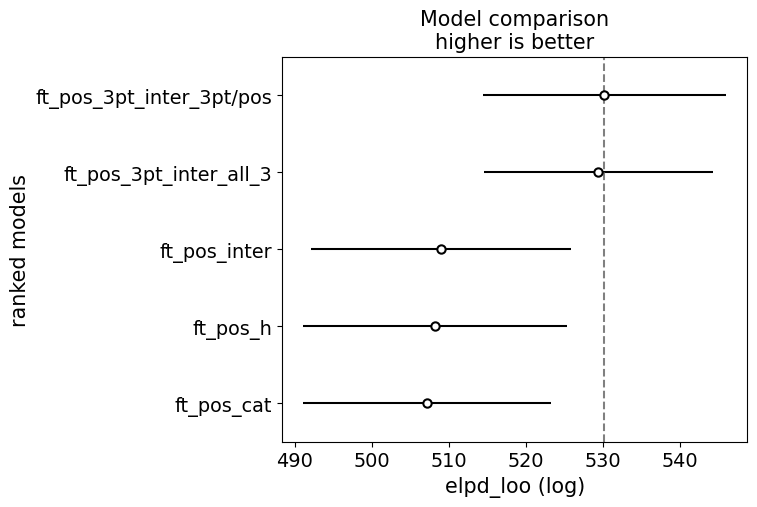

In [9]:
compare = az.compare({"ft_pos_cat":ft_pos_cat, "ft_pos_h":ft_pos_h, "ft_pos_inter":ft_pos_inter, "ft_pos_3pt_inter_all_3":ft_pos_3pt_inter, "ft_pos_3pt_inter_3pt/pos":ft_pos_3pt_inter2})
az.plot_compare(compare)


**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

Models that include three-point attempts perform better than those that do not. The model with 3PA and position interactions is better than the one with all interactions because players who take more three-pointers tend to be better shooters, including at free throws. Players who aren't strong shooters usually avoid three-pointers.